<a href="https://colab.research.google.com/github/TimL2/Group_Project_2_ML_Bot/blob/Tim/ML_Trading_Bot-Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [383]:
!pip install alpaca-trade-api
!pip install finta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [384]:
# Initial imports
import pandas as pd
import alpaca_trade_api as tradeapi
from finta import TA
import numpy as np

In [385]:
ALPACA_API_KEY = 'PKETI0Q5C8PPUXVNHJFJ'
ALPACA_SECRET_KEY = 'WQxmEpBCoMXydCCg0G8cUe6hGLpgaAfrvedZ09Fy'
ALPACA_API_BASE_URL = "https://paper-api.alpaca.markets"

In [386]:
# Create a connection to the API 
api = tradeapi.REST(ALPACA_API_KEY, ALPACA_SECRET_KEY, ALPACA_API_BASE_URL, api_version="v2")

In [387]:
# Set the ticket symbol and the number of shares to buy
ticker = "TSLA"
number_of_shares = 1

In [470]:
# Make API call
prices = api.get_bars(ticker, "1Min", "2022-09-01", "2022-10-19", adjustment='raw').df

In [471]:
signals_df = prices
signals_df

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2022-09-01 06:30:00+00:00,271.14,271.14,271.14,271.14,129,1,271.140000
2022-09-01 08:00:00+00:00,272.66,272.66,270.39,271.00,13617,383,271.164662
2022-09-01 08:01:00+00:00,271.05,271.10,271.00,271.00,2424,134,271.024010
2022-09-01 08:02:00+00:00,270.66,270.66,270.16,270.16,4197,175,270.439565
2022-09-01 08:03:00+00:00,270.48,270.61,270.40,270.54,4619,175,270.515302
...,...,...,...,...,...,...,...
2022-10-19 23:55:00+00:00,208.60,208.65,208.35,208.60,27245,616,208.525752
2022-10-19 23:56:00+00:00,208.61,208.65,208.35,208.40,27303,513,208.487864
2022-10-19 23:57:00+00:00,208.31,208.33,208.00,208.10,47420,1074,208.137274


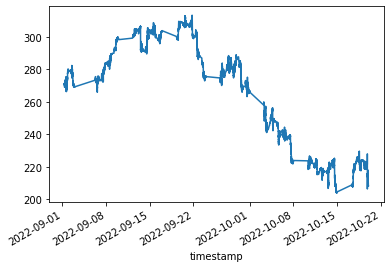

In [472]:
signals_df['close'].plot()

In [473]:
# Calculate the daily returns using the closing prices and the pct_change function
signals_df["actual_returns"] = signals_df["close"].pct_change()
signals_df

,open,high,low,close,volume,trade_count,vwap,actual_returns
timestamp,,,,,,,,
2022-09-01 06:30:00+00:00,271.14,271.14,271.14,271.14,129,1,271.140000,NaN
2022-09-01 08:00:00+00:00,272.66,272.66,270.39,271.00,13617,383,271.164662,-0.000516
2022-09-01 08:01:00+00:00,271.05,271.10,271.00,271.00,2424,134,271.024010,0.000000
2022-09-01 08:02:00+00:00,270.66,270.66,270.16,270.16,4197,175,270.439565,-0.003100
2022-09-01 08:03:00+00:00,270.48,270.61,270.40,270.54,4619,175,270.515302,0.001407
...,...,...,...,...,...,...,...,...
2022-10-19 23:55:00+00:00,208.60,208.65,208.35,208.60,27245,616,208.525752,-0.000192
2022-10-19 23:56:00+00:00,208.61,208.65,208.35,208.40,27303,513,208.487864,-0.000959
2022-10-19 23:57:00+00:00,208.31,208.33,208.00,208.10,47420,1074,208.137274,-0.001440


In [474]:
#  Setup EMAs for crosses later
signals_df["9EMA"] = TA.EMA(signals_df, 9)
signals_df["20EMA"] = TA.EMA(signals_df, 20)
signals_df["50EMA"] = TA.EMA(signals_df, 50)
signals_df["200SMA"] = TA.SMA(signals_df, 200)

# Setup Indicators
signals_df["ATR"] = TA.ATR(signals_df)
bbands_df = TA.BBANDS(signals_df)
macd_df = TA.MACD(signals_df)
signals_df["OBV"] = TA.OBV(signals_df)
signals_df["RSI"] = TA.RSI(signals_df)



In [475]:
bbands_df

,BB_UPPER,BB_MIDDLE,BB_LOWER
timestamp,,,
2022-09-01 06:30:00+00:00,NaN,NaN,NaN
2022-09-01 08:00:00+00:00,NaN,NaN,NaN
2022-09-01 08:01:00+00:00,NaN,NaN,NaN
2022-09-01 08:02:00+00:00,NaN,NaN,NaN
2022-09-01 08:03:00+00:00,NaN,NaN,NaN
...,...,...,...
2022-10-19 23:55:00+00:00,210.811456,209.5855,208.359544
2022-10-19 23:56:00+00:00,210.804727,209.4990,208.193273
2022-10-19 23:57:00+00:00,210.812795,209.3990,207.985205


In [476]:
macd_df

,MACD,SIGNAL
timestamp,,
2022-09-01 06:30:00+00:00,0.000000,0.000000
2022-09-01 08:00:00+00:00,-0.003141,-0.001745
2022-09-01 08:01:00+00:00,-0.004002,-0.002670
2022-09-01 08:02:00+00:00,-0.034624,-0.013495
2022-09-01 08:03:00+00:00,-0.035413,-0.020015
...,...,...
2022-10-19 23:55:00+00:00,-0.437777,-0.320272
2022-10-19 23:56:00+00:00,-0.463343,-0.348886
2022-10-19 23:57:00+00:00,-0.502025,-0.379514


In [477]:
signals_df

,open,high,low,close,volume,trade_count,vwap,actual_returns,9EMA,20EMA,50EMA,200SMA,ATR,OBV,RSI
timestamp,,,,,,,,,,,,,,,
2022-09-01 06:30:00+00:00,271.14,271.14,271.14,271.14,129,1,271.140000,NaN,271.140000,271.140000,271.140000,NaN,NaN,NaN,NaN
2022-09-01 08:00:00+00:00,272.66,272.66,270.39,271.00,13617,383,271.164662,-0.000516,271.062222,271.066500,271.068600,NaN,NaN,-13617.0,0.000000
2022-09-01 08:01:00+00:00,271.05,271.10,271.00,271.00,2424,134,271.024010,0.000000,271.036721,271.042082,271.044813,NaN,NaN,NaN,0.000000
2022-09-01 08:02:00+00:00,270.66,270.66,270.16,270.16,4197,175,270.439565,-0.003100,270.739729,270.787438,270.810164,NaN,NaN,-17814.0,0.000000
2022-09-01 08:03:00+00:00,270.48,270.61,270.40,270.54,4619,175,270.515302,0.001407,270.680314,270.727585,270.751724,NaN,NaN,-13195.0,29.872057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-19 23:55:00+00:00,208.60,208.65,208.35,208.60,27245,616,208.525752,-0.000192,208.979679,209.414573,209.976396,212.373382,0.275714,36025820.0,18.285926
2022-10-19 23:56:00+00:00,208.61,208.65,208.35,208.40,27303,513,208.487864,-0.000959,208.863743,209.317947,209.914577,212.335982,0.283571,35998517.0,16.202238
2022-10-19 23:57:00+00:00,208.31,208.33,208.00,208.10,47420,1074,208.137274,-0.001440,208.710995,209.201952,209.843417,212.298282,0.305714,35951097.0,13.683470


In [478]:
# join signals
bbands_df = pd.concat([bbands_df, macd_df], axis=1)
signals_df = pd.concat([signals_df, bbands_df], axis=1)
signals_df.drop(columns="SIGNAL", inplace=True)
signals_df

,open,high,low,close,volume,trade_count,vwap,actual_returns,9EMA,20EMA,50EMA,200SMA,ATR,OBV,RSI,BB_UPPER,BB_MIDDLE,BB_LOWER,MACD
timestamp,,,,,,,,,,,,,,,,,,,
2022-09-01 06:30:00+00:00,271.14,271.14,271.14,271.14,129,1,271.140000,NaN,271.140000,271.140000,271.140000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2022-09-01 08:00:00+00:00,272.66,272.66,270.39,271.00,13617,383,271.164662,-0.000516,271.062222,271.066500,271.068600,NaN,NaN,-13617.0,0.000000,NaN,NaN,NaN,-0.003141
2022-09-01 08:01:00+00:00,271.05,271.10,271.00,271.00,2424,134,271.024010,0.000000,271.036721,271.042082,271.044813,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,-0.004002
2022-09-01 08:02:00+00:00,270.66,270.66,270.16,270.16,4197,175,270.439565,-0.003100,270.739729,270.787438,270.810164,NaN,NaN,-17814.0,0.000000,NaN,NaN,NaN,-0.034624
2022-09-01 08:03:00+00:00,270.48,270.61,270.40,270.54,4619,175,270.515302,0.001407,270.680314,270.727585,270.751724,NaN,NaN,-13195.0,29.872057,NaN,NaN,NaN,-0.035413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-19 23:55:00+00:00,208.60,208.65,208.35,208.60,27245,616,208.525752,-0.000192,208.979679,209.414573,209.976396,212.373382,0.275714,36025820.0,18.285926,210.811456,209.5855,208.359544,-0.437777
2022-10-19 23:56:00+00:00,208.61,208.65,208.35,208.40,27303,513,208.487864,-0.000959,208.863743,209.317947,209.914577,212.335982,0.283571,35998517.0,16.202238,210.804727,209.4990,208.193273,-0.463343
2022-10-19 23:57:00+00:00,208.31,208.33,208.00,208.10,47420,1074,208.137274,-0.001440,208.710995,209.201952,209.843417,212.298282,0.305714,35951097.0,13.683470,210.812795,209.3990,207.985205,-0.502025


In [479]:
# Position Relative to BollingerBands, Above BB = 1, Below BB = -1, Inbetween both = 0
signals_df["Bollinger_Bands_Position"] = 0.0
# 9EMA is above 20EMA = 1
signals_df["9EMA>20EMA"] = 0.0
# 50 EMA is above 200SMA = 1
signals_df["50EMA>200SMA"] = 0.0
# MACD Increasing = 1, Decreasing = -1
signals_df["MACD"] = 0.0
# OBV is positive = 1
signals_df["OBV_Over/Under"] = 0.0
# Position Relative to RSI = 70 & RSI = 30
signals_df["RSI_Position"] = 0.0
# Price is above VWAP = 1
signals_df["VWAP_Cross"] = 0.0

In [480]:
signals_df

,open,high,low,close,volume,trade_count,vwap,actual_returns,9EMA,20EMA,...,BB_UPPER,BB_MIDDLE,BB_LOWER,MACD,Bollinger_Bands_Position,9EMA>20EMA,50EMA>200SMA,OBV_Over/Under,RSI_Position,VWAP_Cross
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-09-01 06:30:00+00:00,271.14,271.14,271.14,271.14,129,1,271.140000,NaN,271.140000,271.140000,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 08:00:00+00:00,272.66,272.66,270.39,271.00,13617,383,271.164662,-0.000516,271.062222,271.066500,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 08:01:00+00:00,271.05,271.10,271.00,271.00,2424,134,271.024010,0.000000,271.036721,271.042082,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 08:02:00+00:00,270.66,270.66,270.16,270.16,4197,175,270.439565,-0.003100,270.739729,270.787438,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 08:03:00+00:00,270.48,270.61,270.40,270.54,4619,175,270.515302,0.001407,270.680314,270.727585,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-19 23:55:00+00:00,208.60,208.65,208.35,208.60,27245,616,208.525752,-0.000192,208.979679,209.414573,...,210.811456,209.5855,208.359544,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-10-19 23:56:00+00:00,208.61,208.65,208.35,208.40,27303,513,208.487864,-0.000959,208.863743,209.317947,...,210.804727,209.4990,208.193273,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-10-19 23:57:00+00:00,208.31,208.33,208.00,208.10,47420,1074,208.137274,-0.001440,208.710995,209.201952,...,210.812795,209.3990,207.985205,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [481]:
# Generate the trading signals 1 (entry) or -1 (exit) for a long position trading algorithm
# where -1 is when the Close price is less than the BB_LOWER window
# where 1 is when the Close price is greater the the BB_UPPER window
for index, row in signals_df.iterrows():
    if row["close"] < row["BB_LOWER"]:
        signals_df.loc[index, "Bollinger_Bands_Position"] = -1.0
    if row["close"] > row["BB_UPPER"]:
        signals_df.loc[index,"Bollinger_Bands_Position"] = 1.0

# Review the DataFrame
signals_df

,open,high,low,close,volume,trade_count,vwap,actual_returns,9EMA,20EMA,...,BB_UPPER,BB_MIDDLE,BB_LOWER,MACD,Bollinger_Bands_Position,9EMA>20EMA,50EMA>200SMA,OBV_Over/Under,RSI_Position,VWAP_Cross
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-09-01 06:30:00+00:00,271.14,271.14,271.14,271.14,129,1,271.140000,NaN,271.140000,271.140000,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 08:00:00+00:00,272.66,272.66,270.39,271.00,13617,383,271.164662,-0.000516,271.062222,271.066500,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 08:01:00+00:00,271.05,271.10,271.00,271.00,2424,134,271.024010,0.000000,271.036721,271.042082,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 08:02:00+00:00,270.66,270.66,270.16,270.16,4197,175,270.439565,-0.003100,270.739729,270.787438,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 08:03:00+00:00,270.48,270.61,270.40,270.54,4619,175,270.515302,0.001407,270.680314,270.727585,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-19 23:55:00+00:00,208.60,208.65,208.35,208.60,27245,616,208.525752,-0.000192,208.979679,209.414573,...,210.811456,209.5855,208.359544,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-10-19 23:56:00+00:00,208.61,208.65,208.35,208.40,27303,513,208.487864,-0.000959,208.863743,209.317947,...,210.804727,209.4990,208.193273,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-10-19 23:57:00+00:00,208.31,208.33,208.00,208.10,47420,1074,208.137274,-0.001440,208.710995,209.201952,...,210.812795,209.3990,207.985205,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [482]:
# Generate the trading signal 1 or 0,
# where 1 is when the Short window is greater than (or crosses over) the Long Window
# where 0 is when the Short window is under the Long window
signals_df["9EMA>20EMA"][9:] = np.where(
    signals_df["9EMA"][9:] > signals_df["20EMA"][9:], 1.0, 0.0
)

# Calculate the points in time at which a position should be taken, 1 or -1
signals_df["9EMA>20EMA"] = signals_df["9EMA>20EMA"].diff()

# Review the DataFrame
signals_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,open,high,low,close,volume,trade_count,vwap,actual_returns,9EMA,20EMA,...,BB_UPPER,BB_MIDDLE,BB_LOWER,MACD,Bollinger_Bands_Position,9EMA>20EMA,50EMA>200SMA,OBV_Over/Under,RSI_Position,VWAP_Cross
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-09-01 06:30:00+00:00,271.14,271.14,271.14,271.14,129,1,271.140000,NaN,271.140000,271.140000,...,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0
2022-09-01 08:00:00+00:00,272.66,272.66,270.39,271.00,13617,383,271.164662,-0.000516,271.062222,271.066500,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 08:01:00+00:00,271.05,271.10,271.00,271.00,2424,134,271.024010,0.000000,271.036721,271.042082,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 08:02:00+00:00,270.66,270.66,270.16,270.16,4197,175,270.439565,-0.003100,270.739729,270.787438,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 08:03:00+00:00,270.48,270.61,270.40,270.54,4619,175,270.515302,0.001407,270.680314,270.727585,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-19 23:55:00+00:00,208.60,208.65,208.35,208.60,27245,616,208.525752,-0.000192,208.979679,209.414573,...,210.811456,209.5855,208.359544,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-10-19 23:56:00+00:00,208.61,208.65,208.35,208.40,27303,513,208.487864,-0.000959,208.863743,209.317947,...,210.804727,209.4990,208.193273,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-10-19 23:57:00+00:00,208.31,208.33,208.00,208.10,47420,1074,208.137274,-0.001440,208.710995,209.201952,...,210.812795,209.3990,207.985205,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [483]:
# Generate the trading signal 1 or 0,
# where 1 is when the Short window is greater than (or crosses over) the Long Window
# where 0 is when the Short window is under the Long window
signals_df["50EMA>200SMA"][50:] = np.where(
    signals_df["50EMA"][50:] > signals_df["200SMA"][50:], 1.0, 0.0
)

# Calculate the points in time at which a position should be taken, 1 or -1
signals_df["50EMA>200SMA"] = signals_df["50EMA>200SMA"].diff()

# Review the DataFrame
signals_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,open,high,low,close,volume,trade_count,vwap,actual_returns,9EMA,20EMA,...,BB_UPPER,BB_MIDDLE,BB_LOWER,MACD,Bollinger_Bands_Position,9EMA>20EMA,50EMA>200SMA,OBV_Over/Under,RSI_Position,VWAP_Cross
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-09-01 06:30:00+00:00,271.14,271.14,271.14,271.14,129,1,271.140000,NaN,271.140000,271.140000,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0
2022-09-01 08:00:00+00:00,272.66,272.66,270.39,271.00,13617,383,271.164662,-0.000516,271.062222,271.066500,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 08:01:00+00:00,271.05,271.10,271.00,271.00,2424,134,271.024010,0.000000,271.036721,271.042082,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 08:02:00+00:00,270.66,270.66,270.16,270.16,4197,175,270.439565,-0.003100,270.739729,270.787438,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 08:03:00+00:00,270.48,270.61,270.40,270.54,4619,175,270.515302,0.001407,270.680314,270.727585,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-19 23:55:00+00:00,208.60,208.65,208.35,208.60,27245,616,208.525752,-0.000192,208.979679,209.414573,...,210.811456,209.5855,208.359544,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-10-19 23:56:00+00:00,208.61,208.65,208.35,208.40,27303,513,208.487864,-0.000959,208.863743,209.317947,...,210.804727,209.4990,208.193273,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-10-19 23:57:00+00:00,208.31,208.33,208.00,208.10,47420,1074,208.137274,-0.001440,208.710995,209.201952,...,210.812795,209.3990,207.985205,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [484]:
signals_df["50EMA>200SMA"].value_counts()

 0.0    30106
 1.0       96
-1.0       96
Name: 50EMA>200SMA, dtype: int64

In [485]:
# Generate the trading signal 1 or 0,
# where 1 is when the Short window is greater than (or crosses over) the Long Window
# where 0 is when the Short window is under the Long window
signals_df["OBV_Over/Under"] = np.where(
    signals_df["OBV"] > 0, 1.0, 0.0
)

# Calculate the points in time at which a position should be taken, 1 or -1
signals_df["OBV_Over/Under"] = signals_df["OBV_Over/Under"].diff()

# Review the DataFrame
signals_df

,open,high,low,close,volume,trade_count,vwap,actual_returns,9EMA,20EMA,...,BB_UPPER,BB_MIDDLE,BB_LOWER,MACD,Bollinger_Bands_Position,9EMA>20EMA,50EMA>200SMA,OBV_Over/Under,RSI_Position,VWAP_Cross
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-09-01 06:30:00+00:00,271.14,271.14,271.14,271.14,129,1,271.140000,NaN,271.140000,271.140000,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0
2022-09-01 08:00:00+00:00,272.66,272.66,270.39,271.00,13617,383,271.164662,-0.000516,271.062222,271.066500,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 08:01:00+00:00,271.05,271.10,271.00,271.00,2424,134,271.024010,0.000000,271.036721,271.042082,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 08:02:00+00:00,270.66,270.66,270.16,270.16,4197,175,270.439565,-0.003100,270.739729,270.787438,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 08:03:00+00:00,270.48,270.61,270.40,270.54,4619,175,270.515302,0.001407,270.680314,270.727585,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-19 23:55:00+00:00,208.60,208.65,208.35,208.60,27245,616,208.525752,-0.000192,208.979679,209.414573,...,210.811456,209.5855,208.359544,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-10-19 23:56:00+00:00,208.61,208.65,208.35,208.40,27303,513,208.487864,-0.000959,208.863743,209.317947,...,210.804727,209.4990,208.193273,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-10-19 23:57:00+00:00,208.31,208.33,208.00,208.10,47420,1074,208.137274,-0.001440,208.710995,209.201952,...,210.812795,209.3990,207.985205,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [486]:
signals_df["OBV_Over/Under"].value_counts()

 0.0    27875
 1.0     1212
-1.0     1211
Name: OBV_Over/Under, dtype: int64

In [487]:
# Generate the trading signals 1 (entry) or -1 (exit) for a long position trading algorithm
# where -1 is when the Close price is less than the BB_LOWER window
# where 1 is when the Close price is greater the the BB_UPPER window
for index, row in signals_df.iterrows():
    if 30 > row["RSI"]:
        signals_df.loc[index, "RSI_Position"] = -1.0
    if 70 < row["RSI"]:
        signals_df.loc[index,"RSI_Position"] = 1.0

# Review the DataFrame
signals_df

,open,high,low,close,volume,trade_count,vwap,actual_returns,9EMA,20EMA,...,BB_UPPER,BB_MIDDLE,BB_LOWER,MACD,Bollinger_Bands_Position,9EMA>20EMA,50EMA>200SMA,OBV_Over/Under,RSI_Position,VWAP_Cross
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-09-01 06:30:00+00:00,271.14,271.14,271.14,271.14,129,1,271.140000,NaN,271.140000,271.140000,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0
2022-09-01 08:00:00+00:00,272.66,272.66,270.39,271.00,13617,383,271.164662,-0.000516,271.062222,271.066500,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
2022-09-01 08:01:00+00:00,271.05,271.10,271.00,271.00,2424,134,271.024010,0.000000,271.036721,271.042082,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
2022-09-01 08:02:00+00:00,270.66,270.66,270.16,270.16,4197,175,270.439565,-0.003100,270.739729,270.787438,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
2022-09-01 08:03:00+00:00,270.48,270.61,270.40,270.54,4619,175,270.515302,0.001407,270.680314,270.727585,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-19 23:55:00+00:00,208.60,208.65,208.35,208.60,27245,616,208.525752,-0.000192,208.979679,209.414573,...,210.811456,209.5855,208.359544,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
2022-10-19 23:56:00+00:00,208.61,208.65,208.35,208.40,27303,513,208.487864,-0.000959,208.863743,209.317947,...,210.804727,209.4990,208.193273,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
2022-10-19 23:57:00+00:00,208.31,208.33,208.00,208.10,47420,1074,208.137274,-0.001440,208.710995,209.201952,...,210.812795,209.3990,207.985205,0.0,0.0,0.0,0.0,0.0,-1.0,0.0


In [488]:
signals_df["RSI_Position"].value_counts()

 0.0    27887
-1.0     1256
 1.0     1156
Name: RSI_Position, dtype: int64

In [489]:
# Generate the trading signal 1 or 0,
# where 1 is when the Short window is greater than (or crosses over) the Long Window
# where 0 is when the Short window is under the Long window
signals_df["VWAP_Cross"] = np.where(
    signals_df["vwap"] < signals_df["close"], 1.0, 0
)

# Calculate the points in time at which a position should be taken, 1 or -1
signals_df["VWAP_Cross"] = signals_df["VWAP_Cross"].diff()

# Review the DataFrame
signals_df

,open,high,low,close,volume,trade_count,vwap,actual_returns,9EMA,20EMA,...,BB_UPPER,BB_MIDDLE,BB_LOWER,MACD,Bollinger_Bands_Position,9EMA>20EMA,50EMA>200SMA,OBV_Over/Under,RSI_Position,VWAP_Cross
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-09-01 06:30:00+00:00,271.14,271.14,271.14,271.14,129,1,271.140000,NaN,271.140000,271.140000,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN
2022-09-01 08:00:00+00:00,272.66,272.66,270.39,271.00,13617,383,271.164662,-0.000516,271.062222,271.066500,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
2022-09-01 08:01:00+00:00,271.05,271.10,271.00,271.00,2424,134,271.024010,0.000000,271.036721,271.042082,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
2022-09-01 08:02:00+00:00,270.66,270.66,270.16,270.16,4197,175,270.439565,-0.003100,270.739729,270.787438,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
2022-09-01 08:03:00+00:00,270.48,270.61,270.40,270.54,4619,175,270.515302,0.001407,270.680314,270.727585,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-19 23:55:00+00:00,208.60,208.65,208.35,208.60,27245,616,208.525752,-0.000192,208.979679,209.414573,...,210.811456,209.5855,208.359544,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
2022-10-19 23:56:00+00:00,208.61,208.65,208.35,208.40,27303,513,208.487864,-0.000959,208.863743,209.317947,...,210.804727,209.4990,208.193273,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0
2022-10-19 23:57:00+00:00,208.31,208.33,208.00,208.10,47420,1074,208.137274,-0.001440,208.710995,209.201952,...,210.812795,209.3990,207.985205,0.0,0.0,0.0,0.0,0.0,-1.0,0.0


In [490]:
signals_df["VWAP_Cross"].value_counts()

 0.0    15183
 1.0     7558
-1.0     7557
Name: VWAP_Cross, dtype: int64

In [491]:
periods = signals_df.shape[0]
periods

30299

In [492]:
signals_df["Exit Price"] = 0
signals_df["Exit"] = 0


In [493]:

# loop thru the dataframe and set variables for use in Exit Price Calculation
for j in range(200, periods):
    # suppose an entry on each candle close (used for Exit Price Calculation)
    entry = signals_df["close"].iloc[j]
    # calculate volatility as a rolling average of the periods' ranges (for stop)
    atr = signals_df["ATR"].iloc[j]
    # stop is 1ATR
    stop = entry - atr
    # target is 3ATR, Risk to Reward is now 3:1
    target = entry + (3 * atr)
    # loop again thru the dataset to compare j entry price to future closing prices to see if we hit target or stop
    for k in range(j + 1, periods):
        # placeholder for this periods' high & low
        curr_low = signals_df["low"].iloc[k]
        curr_high = signals_df["high"].iloc[k]
        # record and break if we hit stop or target, if not we check the next k period
        if curr_low <= stop:
            signals_df["Exit Price"].iloc[j] = stop
            signals_df["Exit"].iloc[j] = -1
            break
        elif curr_high >= target:
            signals_df["Exit Price"].iloc[j] = target
            signals_df["Exit"].iloc[j] = 1
            break

signals_df[:10]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,open,high,low,close,volume,trade_count,vwap,actual_returns,9EMA,20EMA,...,BB_LOWER,MACD,Bollinger_Bands_Position,9EMA>20EMA,50EMA>200SMA,OBV_Over/Under,RSI_Position,VWAP_Cross,Exit Price,Exit
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-09-01 06:30:00+00:00,271.14,271.14,271.14,271.14,129,1,271.140000,NaN,271.140000,271.140000,...,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0
2022-09-01 08:00:00+00:00,272.66,272.66,270.39,271.00,13617,383,271.164662,-0.000516,271.062222,271.066500,...,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0
2022-09-01 08:01:00+00:00,271.05,271.10,271.00,271.00,2424,134,271.024010,0.000000,271.036721,271.042082,...,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0
2022-09-01 08:02:00+00:00,270.66,270.66,270.16,270.16,4197,175,270.439565,-0.003100,270.739729,270.787438,...,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0
2022-09-01 08:03:00+00:00,270.48,270.61,270.40,270.54,4619,175,270.515302,0.001407,270.680314,270.727585,...,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0
2022-09-01 08:04:00+00:00,270.54,270.54,270.50,270.54,11906,279,270.535058,0.000000,270.642281,270.688013,...,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0
2022-09-01 08:05:00+00:00,270.61,270.65,270.51,270.65,3848,146,270.657015,0.000407,270.644235,270.680826,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0
2022-09-01 08:06:00+00:00,271.00,271.29,271.00,271.11,3258,107,271.149683,0.001700,270.756167,270.755011,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2022-09-01 08:07:00+00:00,271.20,271.29,271.20,271.29,1652,103,271.169255,0.000664,270.879485,270.840826,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [494]:
column_names = signals_df.columns
df = pd.DataFrame(columns = column_names)
df

,open,high,low,close,volume,trade_count,vwap,actual_returns,9EMA,20EMA,...,BB_LOWER,MACD,Bollinger_Bands_Position,9EMA>20EMA,50EMA>200SMA,OBV_Over/Under,RSI_Position,VWAP_Cross,Exit Price,Exit


In [495]:
for index, row in signals_df.iterrows(): 
    if signals_df["Bollinger_Bands_Position"].loc[index] == 1:
        df.loc[index] = signals_df.loc[index]
    if signals_df["Bollinger_Bands_Position"].loc[index] == -1:
        df.loc[index] = signals_df.loc[index]
        
df.tail()

,open,high,low,close,volume,trade_count,vwap,actual_returns,9EMA,20EMA,...,BB_LOWER,MACD,Bollinger_Bands_Position,9EMA>20EMA,50EMA>200SMA,OBV_Over/Under,RSI_Position,VWAP_Cross,Exit Price,Exit
2022-10-19 23:49:00+00:00,209.35,209.35,209.21,209.21,14905.0,373.0,209.284834,-0.000907,209.753322,209.976204,...,209.467550,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,208.994286,-1.0
2022-10-19 23:50:00+00:00,209.21,209.23,209.02,209.02,15791.0,421.0,209.145429,-0.000908,209.606657,209.885137,...,209.259549,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,208.800000,-1.0
2022-10-19 23:51:00+00:00,209.03,209.10,208.67,208.88,32821.0,1069.0,208.927459,-0.000670,209.461326,209.789410,...,209.053032,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,208.640000,-1.0
2022-10-19 23:52:00+00:00,208.66,208.80,208.60,208.80,28074.0,567.0,208.685749,-0.000383,209.329061,209.695180,...,208.867943,0.0,-1.0,0.0,0.0,0.0,-1.0,1.0,208.554286,-1.0
2022-10-19 23:53:00+00:00,208.71,208.71,208.50,208.60,26154.0,535.0,208.614439,-0.000958,209.183249,209.590878,...,208.664528,0.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,208.343571,-1.0


In [496]:
for index, row in signals_df.iterrows(): 
    if signals_df["9EMA>20EMA"].loc[index] == 1:
        df.loc[index] = signals_df.loc[index]
    if signals_df["9EMA>20EMA"].loc[index] == -1:
        df.loc[index] = signals_df.loc[index]
        
df.tail()

,open,high,low,close,volume,trade_count,vwap,actual_returns,9EMA,20EMA,...,BB_LOWER,MACD,Bollinger_Bands_Position,9EMA>20EMA,50EMA>200SMA,OBV_Over/Under,RSI_Position,VWAP_Cross,Exit Price,Exit
2022-10-19 21:07:00+00:00,214.41,214.59,213.7001,213.7001,31953.0,577.0,214.038295,-0.003264,214.289219,214.339575,...,213.337544,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,217.119393,1.0
2022-10-19 21:30:00+00:00,213.99,214.00,213.6400,213.7000,32041.0,400.0,213.756752,-0.001309,213.962058,213.982397,...,213.541451,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,214.904264,1.0
2022-10-19 21:32:00+00:00,213.85,214.20,213.8500,214.2000,17097.0,228.0,214.067181,0.000981,214.014117,214.003776,...,213.565858,0.0,0.0,1.0,0.0,0.0,0.0,0.0,215.417121,1.0
2022-10-19 21:49:00+00:00,215.15,215.15,213.9000,214.0000,111304.0,1251.0,214.557994,-0.005206,215.720862,215.733184,...,213.314412,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,212.691436,-1.0
2022-10-19 23:28:00+00:00,210.44,210.50,210.3300,210.3500,8239.0,165.0,210.407619,-0.000285,210.469849,210.484355,...,210.197753,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,210.167864,-1.0


In [497]:
for index, row in signals_df.iterrows(): 
    if signals_df["50EMA>200SMA"].loc[index] == 1:
        df.loc[index] = signals_df.loc[index]
    if signals_df["50EMA>200SMA"].loc[index] == -1:
        df.loc[index] = signals_df.loc[index]
        
df.tail()

,open,high,low,close,volume,trade_count,vwap,actual_returns,9EMA,20EMA,...,BB_LOWER,MACD,Bollinger_Bands_Position,9EMA>20EMA,50EMA>200SMA,OBV_Over/Under,RSI_Position,VWAP_Cross,Exit Price,Exit
2022-10-19 10:10:00+00:00,222.90,223.0000,222.85,222.8500,4906.0,104.0,222.934863,-0.000449,222.868861,222.748579,...,222.438981,0.0,0.0,0.0,1.0,0.0,0.0,0.0,222.682143,-1.0
2022-10-19 11:29:00+00:00,220.23,220.5000,220.14,220.2300,13913.0,260.0,220.222912,0.000045,220.541969,220.915852,...,219.647008,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,219.846986,-1.0
2022-10-19 14:13:00+00:00,220.55,220.6899,220.25,220.3617,102428.0,1268.0,220.497275,-0.000673,220.291754,220.246569,...,219.266665,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,222.849257,1.0
2022-10-19 16:30:00+00:00,220.15,220.1999,219.86,220.1455,68431.0,997.0,220.033999,-0.000061,220.149773,220.339466,...,219.833827,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,221.150371,1.0
2022-10-19 18:17:00+00:00,221.46,221.7299,221.42,221.6599,70910.0,776.0,221.618050,0.000948,221.383280,221.039845,...,220.004099,0.0,0.0,0.0,1.0,0.0,0.0,1.0,221.309579,-1.0


In [498]:
for index, row in signals_df.iterrows(): 
    if signals_df["OBV_Over/Under"].loc[index] == 1:
        df.loc[index] = signals_df.loc[index]
    if signals_df["OBV_Over/Under"].loc[index] == -1:
        df.loc[index] = signals_df.loc[index]
        
df.tail()

,open,high,low,close,volume,trade_count,vwap,actual_returns,9EMA,20EMA,...,BB_LOWER,MACD,Bollinger_Bands_Position,9EMA>20EMA,50EMA>200SMA,OBV_Over/Under,RSI_Position,VWAP_Cross,Exit Price,Exit
2022-10-19 22:20:00+00:00,212.31,212.34,211.61,211.98,25420.0,418.0,212.023804,-0.001742,212.143865,212.282500,...,210.576750,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,211.375714,-1.0
2022-10-19 23:35:00+00:00,210.28,210.28,210.20,210.20,9074.0,212.0,210.212074,0.000000,210.290639,210.366072,...,210.103639,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,210.047857,-1.0
2022-10-19 23:36:00+00:00,210.16,210.19,210.05,210.13,16183.0,298.0,210.114745,-0.000333,210.258512,210.343589,...,210.072340,0.0,0.0,0.0,0.0,1.0,0.0,1.0,209.975000,-1.0
2022-10-19 23:38:00+00:00,210.10,210.20,210.00,210.10,33890.0,594.0,210.055465,0.000000,210.201447,210.299401,...,210.001348,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,209.947857,-1.0
2022-10-19 23:39:00+00:00,210.05,210.15,210.00,210.00,19267.0,451.0,210.029519,-0.000476,210.161158,210.270886,...,209.947966,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,209.852143,-1.0


In [499]:
for index, row in signals_df.iterrows(): 
    if signals_df["RSI_Position"].loc[index] == 1:
        df.loc[index] = signals_df.loc[index]
    if signals_df["RSI_Position"].loc[index] == -1:
        df.loc[index] = signals_df.loc[index]
        
df.tail()

,open,high,low,close,volume,trade_count,vwap,actual_returns,9EMA,20EMA,...,BB_LOWER,MACD,Bollinger_Bands_Position,9EMA>20EMA,50EMA>200SMA,OBV_Over/Under,RSI_Position,VWAP_Cross,Exit Price,Exit
2022-10-19 23:55:00+00:00,208.60,208.65,208.35,208.60,27245.0,616.0,208.525752,-0.000192,208.979679,209.414573,...,208.359544,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,208.324286,-1.0
2022-10-19 23:56:00+00:00,208.61,208.65,208.35,208.40,27303.0,513.0,208.487864,-0.000959,208.863743,209.317947,...,208.193273,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,208.116429,-1.0
2022-10-19 23:57:00+00:00,208.31,208.33,208.00,208.10,47420.0,1074.0,208.137274,-0.001440,208.710995,209.201952,...,207.985205,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,207.794286,-1.0
2022-10-19 23:58:00+00:00,208.10,208.10,207.80,207.85,60774.0,1467.0,207.969063,-0.001201,208.538796,209.073195,...,207.754439,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.000000,0.0
2022-10-19 23:59:00+00:00,207.85,208.16,207.66,208.16,41608.0,1003.0,207.872665,0.001491,208.463037,208.986224,...,207.622381,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.000000,0.0


In [500]:
for index, row in signals_df.iterrows(): 
    if signals_df["VWAP_Cross"].loc[index] == 1:
        df.loc[index] = signals_df.loc[index]
    if signals_df["VWAP_Cross"].loc[index] == -1:
        df.loc[index] = signals_df.loc[index]
        
df.tail()

,open,high,low,close,volume,trade_count,vwap,actual_returns,9EMA,20EMA,...,BB_LOWER,MACD,Bollinger_Bands_Position,9EMA>20EMA,50EMA>200SMA,OBV_Over/Under,RSI_Position,VWAP_Cross,Exit Price,Exit
2022-10-19 23:41:00+00:00,210.14,210.15,210.06,210.06,8918.0,287.0,210.097313,-0.000095,210.127941,210.234354,...,209.894232,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,209.919286,-1.0
2022-10-19 23:42:00+00:00,210.07,210.25,210.07,210.19,12632.0,191.0,210.154600,0.000619,210.140353,210.230130,...,209.902133,0.0,0.0,0.0,0.0,0.0,0.0,1.0,210.047857,-1.0
2022-10-19 23:43:00+00:00,210.18,210.20,210.11,210.13,7182.0,181.0,210.175141,-0.000285,210.138282,210.220593,...,209.920274,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,209.991429,-1.0
2022-10-19 23:45:00+00:00,210.05,210.10,209.90,210.10,30214.0,591.0,209.998183,0.000476,210.108501,210.190100,...,209.947798,0.0,0.0,0.0,0.0,0.0,0.0,1.0,209.954286,-1.0
2022-10-19 23:47:00+00:00,209.72,209.87,209.56,209.87,16344.0,348.0,209.724281,0.000334,210.011440,210.126000,...,209.846825,0.0,0.0,0.0,0.0,0.0,0.0,1.0,209.695000,-1.0


In [501]:
df = df.loc[df["Exit"] != 0]
df

,open,high,low,close,volume,trade_count,vwap,actual_returns,9EMA,20EMA,...,BB_LOWER,MACD,Bollinger_Bands_Position,9EMA>20EMA,50EMA>200SMA,OBV_Over/Under,RSI_Position,VWAP_Cross,Exit Price,Exit
2022-09-01 12:18:00+00:00,272.5799,272.5799,272.44,272.44,1828.0,57.0,272.460122,-0.000514,272.713360,272.831401,...,272.470489,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,272.251450,-1.0
2022-09-01 12:31:00+00:00,273.0000,273.0000,271.70,271.72,12911.0,385.0,272.174818,-0.004689,272.461321,272.581132,...,272.040026,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,271.440743,-1.0
2022-09-01 12:32:00+00:00,271.7000,272.1804,271.65,271.65,7159.0,229.0,271.781055,-0.000258,272.299057,272.492453,...,271.856010,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,271.342857,-1.0
2022-09-01 12:33:00+00:00,271.6500,272.0000,271.52,271.56,5327.0,143.0,271.719578,-0.000331,272.151245,272.403648,...,271.684164,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,271.232857,-1.0
2022-09-01 12:34:00+00:00,271.8453,271.8453,271.12,271.25,15949.0,378.0,271.421092,-0.001142,271.970996,272.293777,...,271.452253,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,272.339707,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-19 23:41:00+00:00,210.1400,210.1500,210.06,210.06,8918.0,287.0,210.097313,-0.000095,210.127941,210.234354,...,209.894232,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,209.919286,-1.0
2022-10-19 23:42:00+00:00,210.0700,210.2500,210.07,210.19,12632.0,191.0,210.154600,0.000619,210.140353,210.230130,...,209.902133,0.0,0.0,0.0,0.0,0.0,0.0,1.0,210.047857,-1.0
2022-10-19 23:43:00+00:00,210.1800,210.2000,210.11,210.13,7182.0,181.0,210.175141,-0.000285,210.138282,210.220593,...,209.920274,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,209.991429,-1.0
2022-10-19 23:45:00+00:00,210.0500,210.1000,209.90,210.10,30214.0,591.0,209.998183,0.000476,210.108501,210.190100,...,209.947798,0.0,0.0,0.0,0.0,0.0,0.0,1.0,209.954286,-1.0


In [502]:
X = df[["Bollinger_Bands_Position", "9EMA>20EMA", "50EMA>200SMA", "OBV_Over/Under", "RSI_Position", "VWAP_Cross"]]
X

,Bollinger_Bands_Position,9EMA>20EMA,50EMA>200SMA,OBV_Over/Under,RSI_Position,VWAP_Cross
2022-09-01 12:18:00+00:00,-1.0,0.0,0.0,0.0,0.0,-1.0
2022-09-01 12:31:00+00:00,-1.0,0.0,0.0,0.0,0.0,-1.0
2022-09-01 12:32:00+00:00,-1.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 12:33:00+00:00,-1.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 12:34:00+00:00,-1.0,0.0,0.0,0.0,-1.0,0.0
...,...,...,...,...,...,...
2022-10-19 23:41:00+00:00,0.0,0.0,0.0,0.0,0.0,-1.0
2022-10-19 23:42:00+00:00,0.0,0.0,0.0,0.0,0.0,1.0
2022-10-19 23:43:00+00:00,0.0,0.0,0.0,0.0,0.0,-1.0
2022-10-19 23:45:00+00:00,0.0,0.0,0.0,0.0,0.0,1.0


In [503]:
y = df.loc[df["Exit"] != 0]
y = y['Exit']
y

2022-09-01 12:18:00+00:00   -1.0
2022-09-01 12:31:00+00:00   -1.0
2022-09-01 12:32:00+00:00   -1.0
2022-09-01 12:33:00+00:00   -1.0
2022-09-01 12:34:00+00:00    1.0
                            ... 
2022-10-19 23:41:00+00:00   -1.0
2022-10-19 23:42:00+00:00   -1.0
2022-10-19 23:43:00+00:00   -1.0
2022-10-19 23:45:00+00:00   -1.0
2022-10-19 23:47:00+00:00   -1.0
Name: Exit, Length: 19598, dtype: float64

In [504]:
# Imports 
from pandas.tseries.offsets import DateOffset

In [505]:
# Select the start of the training period
training_begin = str(y.index.min())

# Display the training begin date
training_begin

'2022-09-01 12:18:00+00:00'

In [509]:
# Select the ending period for the training data with an offset of 3 months
training_end = str(y.index.min() + DateOffset(months=1))

# Display the training end date
training_end

'2022-10-01 12:18:00+00:00'

In [510]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Display sample data
X_train

,Bollinger_Bands_Position,9EMA>20EMA,50EMA>200SMA,OBV_Over/Under,RSI_Position,VWAP_Cross
2022-09-01 12:18:00+00:00,-1.0,0.0,0.0,0.0,0.0,-1.0
2022-09-01 12:31:00+00:00,-1.0,0.0,0.0,0.0,0.0,-1.0
2022-09-01 12:32:00+00:00,-1.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 12:33:00+00:00,-1.0,0.0,0.0,0.0,0.0,0.0
2022-09-01 12:34:00+00:00,-1.0,0.0,0.0,0.0,-1.0,0.0
...,...,...,...,...,...,...
2022-09-30 23:52:00+00:00,0.0,0.0,0.0,0.0,0.0,1.0
2022-09-30 23:53:00+00:00,0.0,0.0,0.0,0.0,0.0,-1.0
2022-09-30 23:57:00+00:00,0.0,0.0,0.0,0.0,0.0,1.0
2022-09-30 23:58:00+00:00,0.0,0.0,0.0,0.0,0.0,-1.0


In [511]:
y_train

2022-09-01 12:18:00+00:00   -1.0
2022-09-01 12:31:00+00:00   -1.0
2022-09-01 12:32:00+00:00   -1.0
2022-09-01 12:33:00+00:00   -1.0
2022-09-01 12:34:00+00:00    1.0
                            ... 
2022-09-30 23:52:00+00:00   -1.0
2022-09-30 23:53:00+00:00   -1.0
2022-09-30 23:57:00+00:00   -1.0
2022-09-30 23:58:00+00:00   -1.0
2022-09-30 23:59:00+00:00   -1.0
Name: Exit, Length: 11942, dtype: float64

In [512]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end:]
y_test = y.loc[training_end:]

# Display sample data
X_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  This is separate from the ipykernel package so we can avoid doing imports until


,Bollinger_Bands_Position,9EMA>20EMA,50EMA>200SMA,OBV_Over/Under,RSI_Position,VWAP_Cross
2022-10-03 04:42:00+00:00,-1.0,0.0,-1.0,0.0,-1.0,-1.0
2022-10-03 05:44:00+00:00,-1.0,0.0,0.0,0.0,-1.0,1.0
2022-10-03 06:59:00+00:00,-1.0,0.0,0.0,0.0,-1.0,-1.0
2022-10-03 08:00:00+00:00,-1.0,0.0,0.0,0.0,-1.0,0.0
2022-10-03 08:01:00+00:00,-1.0,0.0,0.0,0.0,-1.0,0.0
...,...,...,...,...,...,...
2022-10-19 23:41:00+00:00,0.0,0.0,0.0,0.0,0.0,-1.0
2022-10-19 23:42:00+00:00,0.0,0.0,0.0,0.0,0.0,1.0
2022-10-19 23:43:00+00:00,0.0,0.0,0.0,0.0,0.0,-1.0
2022-10-19 23:45:00+00:00,0.0,0.0,0.0,0.0,0.0,1.0


In [513]:
y_test

2022-10-03 04:42:00+00:00   -1.0
2022-10-03 05:44:00+00:00   -1.0
2022-10-03 06:59:00+00:00   -1.0
2022-10-03 08:00:00+00:00   -1.0
2022-10-03 08:01:00+00:00    1.0
                            ... 
2022-10-19 23:41:00+00:00   -1.0
2022-10-19 23:42:00+00:00   -1.0
2022-10-19 23:43:00+00:00   -1.0
2022-10-19 23:45:00+00:00   -1.0
2022-10-19 23:47:00+00:00   -1.0
Name: Exit, Length: 7656, dtype: float64

In [514]:
 # Imports
from sklearn.preprocessing import StandardScaler

In [515]:
# Create a StandardScaler instance
scaler = StandardScaler()
 
# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)
 
# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [516]:
# Imports
from sklearn import svm
from sklearn.metrics import classification_report

In [517]:
# Create the classifier model
svm_model = svm.SVC()
 
# Fit the model to the data using X_train_scaled and y_train
svm_model = svm_model.fit(X_train_scaled, y_train)

# Use the trained model to predict the trading signals for the training data
training_signal_predictions = svm_model.predict(X_train_scaled)

# Display the sample predictions
training_signal_predictions[:10]

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [518]:
# Evaluate the model using a classification report
training_report = classification_report(y_train, training_signal_predictions)
print(training_report)

              precision    recall  f1-score   support

        -1.0       0.74      1.00      0.85      8867
         1.0       0.92      0.00      0.01      3075

    accuracy                           0.74     11942
   macro avg       0.83      0.50      0.43     11942
weighted avg       0.79      0.74      0.63     11942



In [519]:
 # Use the trained model to predict the trading signals for the testing data.
testing_signal_predictions = svm_model.predict(X_test_scaled)

In [520]:
 # Evaluate the model's ability to predict the trading signal for the testing data
svm_testing_report = classification_report(y_test, testing_signal_predictions)
print(svm_testing_report)

              precision    recall  f1-score   support

        -1.0       0.73      1.00      0.85      5615
         1.0       0.22      0.00      0.00      2041

    accuracy                           0.73      7656
   macro avg       0.48      0.50      0.42      7656
weighted avg       0.60      0.73      0.62      7656



In [521]:
 # Create a new empty predictions DataFrame using code provided below.
predictions_df = pd.DataFrame(index=X_test.index)
predictions_df["predicted_signal"] = testing_signal_predictions
predictions_df["actual_returns"] = signals_df["actual_returns"]
predictions_df["trading_algorithm_returns"] = predictions_df["actual_returns"] * predictions_df["predicted_signal"]
predictions_df.head()

,predicted_signal,actual_returns,trading_algorithm_returns
2022-10-03 04:42:00+00:00,-1.0,-0.029769,0.029769
2022-10-03 05:44:00+00:00,-1.0,-0.000504,0.000504
2022-10-03 06:59:00+00:00,-1.0,-0.006538,0.006538
2022-10-03 08:00:00+00:00,-1.0,-0.023541,0.023541
2022-10-03 08:01:00+00:00,-1.0,-0.011797,0.011797


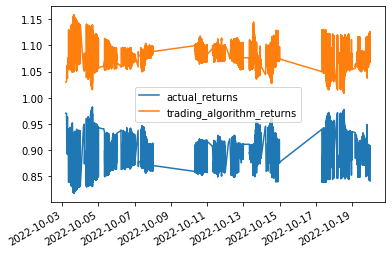

In [522]:
 # Calculate and plot the cumulative returns for the `actual_returns` and the `trading_algorithm_returns`
(1 + predictions_df[["actual_returns", "trading_algorithm_returns"]]).cumprod().plot()

In [523]:
 # Import LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

In [524]:
# Create an instance of the LogisticRegression model
logistic_regression_model = LogisticRegression()

In [525]:
# Fit the LogisticRegression model
logistic_regression_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [526]:
# Use the trained LogisticRegression model to predict the trading signals for the training data
lr_training_signal_predictions = logistic_regression_model.predict(X_train_scaled)

# Display the predictions
lr_training_signal_predictions

array([-1., -1., -1., ..., -1., -1., -1.])

In [527]:
# Generate a classification report using the training data and the logistic regression model's predications
lr_training_report = classification_report(y_train, lr_training_signal_predictions)

# Review the classification report
print(lr_training_report)

              precision    recall  f1-score   support

        -1.0       0.74      1.00      0.85      8867
         1.0       0.00      0.00      0.00      3075

    accuracy                           0.74     11942
   macro avg       0.37      0.50      0.43     11942
weighted avg       0.55      0.74      0.63     11942



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [528]:
# Use the trained model to predict the trading signals for the testing data.
lr_testing_signal_predictions = logistic_regression_model.predict(X_test_scaled)

In [529]:
# Generate a classification report using the testing data and the logistic regression model's predictions
lr_testing_report = classification_report(y_test, lr_testing_signal_predictions)

# Review the testing classification report
print(lr_testing_report)

              precision    recall  f1-score   support

        -1.0       0.73      1.00      0.85      5615
         1.0       0.00      0.00      0.00      2041

    accuracy                           0.73      7656
   macro avg       0.37      0.50      0.42      7656
weighted avg       0.54      0.73      0.62      7656



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [530]:
# Print the classification report for the Logistic Regression model using the test data
print("Logistic Regression Classification Report")
print(lr_testing_report)

Logistic Regression Classification Report
              precision    recall  f1-score   support

        -1.0       0.73      1.00      0.85      5615
         1.0       0.00      0.00      0.00      2041

    accuracy                           0.73      7656
   macro avg       0.37      0.50      0.42      7656
weighted avg       0.54      0.73      0.62      7656



In [531]:
# Print the classification report for the SVM model using the test data
print("SVM Classification Report")
print(svm_testing_report)

SVM Classification Report
              precision    recall  f1-score   support

        -1.0       0.73      1.00      0.85      5615
         1.0       0.22      0.00      0.00      2041

    accuracy                           0.73      7656
   macro avg       0.48      0.50      0.42      7656
weighted avg       0.60      0.73      0.62      7656

